In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [38]:
epoch = 150
random_state = 0
InputLayer_nodes = 2
hiddenLayer_1_nodes = 20
hiddenLayer_2_nodes = 10
OutputLayer_nodes = 3

In [39]:
import os

folder_name = "images_AS2_Q1_b"

# Get all files in the folder
files = os.listdir(folder_name)

# Loop through the files and delete them
for file in files:
    file_path = os.path.join(folder_name, file)
    try:
        if os.path.isfile(file_path):
            os.unlink(file_path)
    except Exception as e:
        print(f"Error deleting {file_path}: {e}")


In [40]:
df_nls = pd.read_csv('Group20/Classification/NLS_Group20.txt', header=None, delimiter=" ", skiprows=1)
df_nls = df_nls.iloc[: , :-1]
df_nls = df_nls.rename(columns={0: 'a', 1: 'b'})

temp_df = [df_nls.iloc[:500,[0,1]], df_nls.iloc[500:1000,[0,1]], df_nls.iloc[1000:1500,[0,1]]]

df_train_data = pd.DataFrame(columns = ["a", "b", "class"])
df_valid_data = pd.DataFrame(columns = ["a", "b", "class"])
df_test_data = pd.DataFrame(columns = ["a", "b", "class"])

for i in range(3):
    temp_df[i]['class'] = i+1
    # split the dataset
    validDataPercentage = 20
    testDataPercentage = 20
    training_data, testing_data = train_test_split(temp_df[i], test_size=(testDataPercentage+validDataPercentage)*0.01, random_state=random_state)
    valid_data, testing_data = train_test_split(testing_data, test_size=(testDataPercentage/(testDataPercentage+validDataPercentage)), random_state=random_state)
    df_train_data = pd.merge(df_train_data, training_data, how='outer')
    df_valid_data = pd.merge(df_valid_data, valid_data, how='outer')
    df_test_data  = pd.merge(df_test_data , testing_data, how='outer')


df_train_data = df_train_data.sample(frac=1, random_state=random_state).reset_index(drop=True)
df_valid_data = df_valid_data.sample(frac=1, random_state=random_state).reset_index(drop=True)
df_test_data = df_test_data.sample(frac=1, random_state=random_state).reset_index(drop=True)

df_train_list = [df_train_data.loc[df_train_data['class'] == 1], df_train_data.loc[df_train_data['class'] == 2], df_train_data.loc[df_train_data['class'] == 3]]
df_valid_list = [df_valid_data.loc[df_valid_data['class'] == 1], df_valid_data.loc[df_valid_data['class'] == 2], df_valid_data.loc[df_valid_data['class'] == 3]]
df_test_list = [df_test_data.loc[df_test_data['class'] == 1], df_test_data.loc[df_test_data['class'] == 2], df_test_data.loc[df_test_data['class'] == 3]]


print(df_train_data.shape)
print(df_valid_data.shape)
print(df_test_data.shape)

(900, 3)
(300, 3)
(300, 3)


In [41]:
def saveImage(plt, folder_path, file_name):
    file_path = f"{folder_path}/{file_name}"
    plt.savefig(file_path)

In [42]:
# list of list in which first index input matrix and at second index output matrix and so on for each model
w_matrix_dict = {}

np.random.seed(random_state)
# # Input to hidden layer1 Matrix: (d+1) x j
w_i_h1_matrix = np.random.rand(InputLayer_nodes+1, hiddenLayer_1_nodes)

# # hidden layer1 to hidden layer2 Matrix: (j+1) x l
w_h1_h2_matrix = np.random.rand(hiddenLayer_1_nodes+1, hiddenLayer_2_nodes)

# # Output Matrix: (l+1) x k
w_o_matrix = np.random.rand(hiddenLayer_2_nodes+1, OutputLayer_nodes)


# Input to hidden layer1 Matrix: (d+1) x j
# w_i_h1_matrix = np.zeros((InputLayer_nodes+1, hiddenLayer_1_nodes))

# hidden layer1 to hidden layer2 Matrix: (j+1) x l
# w_h1_h2_matrix = np.zeros((hiddenLayer_1_nodes+1, hiddenLayer_2_nodes))

# Output Matrix: (l+1) x k
# w_o_matrix = np.zeros((hiddenLayer_2_nodes+1, OutputLayer_nodes))


# w_list = [np.array([0.0]*df_train_list[0].shape[1]),np.array([0.0]*df_train_list[0].shape[1]),np.array([0.0]*df_train_list[0].shape[1])]
print('w_i_h1_matrix:\n', w_i_h1_matrix,'\n')
print('w_h1_h2_matrix:\n', w_h1_h2_matrix,'\n')
print('w_o_matrix:\n',w_o_matrix)

w_i_h1_matrix:
 [[0.55 0.72 0.6  0.54 0.42 0.65 0.44 0.89 0.96 0.38 0.79 0.53 0.57 0.93
  0.07 0.09 0.02 0.83 0.78 0.87]
 [0.98 0.8  0.46 0.78 0.12 0.64 0.14 0.94 0.52 0.41 0.26 0.77 0.46 0.57
  0.02 0.62 0.61 0.62 0.94 0.68]
 [0.36 0.44 0.7  0.06 0.67 0.67 0.21 0.13 0.32 0.36 0.57 0.44 0.99 0.1
  0.21 0.16 0.65 0.25 0.47 0.24]] 

w_h1_h2_matrix:
 [[0.16 0.11 0.66 0.14 0.2  0.37 0.82 0.1  0.84 0.1 ]
 [0.98 0.47 0.98 0.6  0.74 0.04 0.28 0.12 0.3  0.12]
 [0.32 0.41 0.06 0.69 0.57 0.27 0.52 0.09 0.58 0.93]
 [0.32 0.67 0.13 0.72 0.29 0.18 0.59 0.02 0.83 0.  ]
 [0.68 0.27 0.74 0.96 0.25 0.58 0.59 0.57 0.22 0.95]
 [0.45 0.85 0.7  0.3  0.81 0.4  0.88 0.58 0.88 0.69]
 [0.73 0.5  0.96 0.64 0.42 0.61 0.02 0.3  0.66 0.29]
 [0.62 0.43 0.14 0.3  0.57 0.59 0.57 0.65 0.65 0.43]
 [0.9  0.37 0.44 0.89 0.81 0.7  0.1  0.92 0.71 1.  ]
 [0.15 0.87 0.16 0.62 0.12 0.85 0.81 0.57 0.41 0.07]
 [0.7  0.45 0.72 0.87 0.98 0.86 0.01 0.36 0.73 0.17]
 [0.52 0.05 0.2  0.02 0.79 0.22 0.35 0.93 0.7  0.03]
 [0.16 0.62 0.

In [43]:
def f(ak):
    return 1/(1+np.exp(-ak))

def g(aj):
    return 1/(1+np.exp(-aj))

def E(yn,ynHat_val):
    return 0.5*((yn-ynHat_val)**2)


def delta_n_k_o(ynk,ynHatk,ank):
    return (ynk-ynHatk)*f(ank)*(1-f(ank))
def deltaWOutput(eta,delta_n_k_o_value,h2nj):
    return eta*delta_n_k_o_value*h2nj

def delta_h1_h2(OutputLayer_nodes,delta_n_k_o_value_list,l, a2nl):
    temp = 0
    for k in range(OutputLayer_nodes):
        temp+=delta_n_k_o_value_list[k]*w_o_matrix[l][k]
    return temp*g(a2nl)*(1-g(a2nl))
def deltaW_h1_h2(eta, delta_h1_h2_value, h1nj):
    return eta*delta_h1_h2_value*h1nj

def deltaW_i_h1(eta, hiddenLayer_2_nodes,delta_n_h1_h2_value_list,j, anj1, xi):
    temp = 0
    for l in range(hiddenLayer_2_nodes):
        temp+=delta_n_h1_h2_value_list[l]*w_h1_h2_matrix[j][l]
    return eta*temp*g(anj1)*(1-g(anj1))*xi

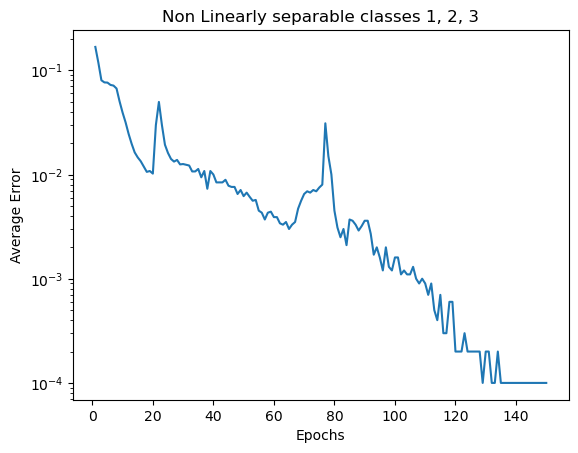

In [44]:
for ds in range(1):
    averageErrorList = []
    for epochIter in range(epoch):
        df_train_data = df_train_data.sample(frac=1, random_state=random_state).reset_index(drop=True)
        # eta = 1/(epochIter+1)
        eta = 1 / (1 + np.log(epochIter+1))
        trainingExamplesLength = df_train_data.shape[0]
        instanetaneousErrorList = []
        for i in range(trainingExamplesLength):
            
            temp = ([0]*OutputLayer_nodes)
            temp[df_train_data.iloc[i,-1]-1] = 1
            yn = np.array(temp)

            xn = df_train_data.iloc[i,:-1]
            xnHat = np.array([1]+xn.to_list())
            
            aj1_value_list = []
            hj1Hat = [1]
            for j in range(hiddenLayer_1_nodes):
                aj = np.dot(xnHat, w_i_h1_matrix[:,j])
                aj1_value_list.append(aj)
                hj = g(aj)
                hj1Hat.append(hj)
            hj1Hat = np.array(hj1Hat)

            aj2_value_list = []
            hj2Hat = [1]
            for l in range(hiddenLayer_2_nodes):
                aj = np.dot(hj1Hat, w_h1_h2_matrix[:,l])
                aj2_value_list.append(aj)
                hj = g(aj)
                hj2Hat.append(hj)
            hj2Hat = np.array(hj2Hat)
        
            ak_value_list = []
            ynHat_val = []
            for k in range(OutputLayer_nodes):
                ak = np.dot(hj2Hat, w_o_matrix[:,k])
                ak_value_list.append(ak)
                f_ak_value = f(ak)
                ynHat_val.append(f_ak_value)
            ynHat_val = np.array(ynHat_val)
            
            instanetaneousError = E(yn,ynHat_val)
            instanetaneousErrorList.append(instanetaneousError)
            
            delta_n_k_o_value_list = []
            # Update Output Matrix: (l+1) x k
            for l in range(hiddenLayer_2_nodes+1):
                for k in range(OutputLayer_nodes):
                    delta_n_k_o_value = delta_n_k_o(yn[k],ynHat_val[k],ak_value_list[k])
                    delta_n_k_o_value_list.append(delta_n_k_o_value)
                    w_o_matrix[l][k]+=deltaWOutput(eta,delta_n_k_o_value,hj2Hat[l])

            delta_n_h1_h2_value_list = []
            # update hidden layer1 to hidden layer2 Matrix: (j+1) x l
            for j in range(hiddenLayer_1_nodes+1):
                for l in range(hiddenLayer_2_nodes):
                    delta_h1_h2_value = delta_h1_h2(OutputLayer_nodes, delta_n_k_o_value_list, l, aj2_value_list[l])
                    delta_n_h1_h2_value_list.append(delta_h1_h2_value)
                    w_h1_h2_matrix[j][l]+=deltaW_h1_h2(eta, delta_h1_h2_value, hj1Hat[j])
            
            # continue

            # Update Input Matrix: (d+1) x j
            for d in range(InputLayer_nodes+1):
                for j in range(hiddenLayer_1_nodes):
                    w_i_h1_matrix[d][j]+=deltaW_i_h1(eta, hiddenLayer_2_nodes, delta_n_h1_h2_value_list, j, aj1_value_list[j], xnHat[d])
                
            # print(w_o_matrix,w_i_h1_matrix)
            # continue

        instanetaneousErrorList = np.array(instanetaneousErrorList)
        averageError = np.mean(instanetaneousErrorList)
        averageErrorList.append(float(f'{averageError:.4f}'))

    w_matrix_dict[ds] = {0:w_i_h1_matrix, 1:w_h1_h2_matrix, 2:w_o_matrix}
    
    plt.plot([i+1 for i in range(epoch)],averageErrorList)
    title = f'Non Linearly separable classes 1, 2, 3'
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Average Error')
    plt.yscale("log")
    # save the plot to a file in a folder
    saveImage(plt, folder_name, title)
    plt.show()


In [45]:
print(len(w_matrix_dict))
w_matrix_dict

1


{0: {0: array([[ 6.56,  0.1 , -1.42, -1.12,  0.73,  1.58, -5.44, -0.75,  1.82,
           2.51,  1.18,  1.39,  1.28, -0.27,  0.37,  9.57, -2.63, -1.4 ,
           0.23,  1.25],
         [-6.22,  6.08,  6.91,  3.57,  1.89,  1.75,  1.74,  2.47,  1.67,
           2.8 ,  2.43,  1.54,  1.44,  1.59,  1.33, -5.44,  5.88,  5.  ,
           2.43,  1.57],
         [ 0.34, -3.04,  0.86,  0.39,  1.26,  2.15, -2.06,  3.93,  1.84,
           0.34,  1.65,  1.84,  1.71,  1.58, -1.49, -5.5 , -1.79,  0.77,
           1.89,  1.77]]),
  1: array([[ 0.6 , -1.51, -2.31, -3.85, -1.32, -0.69, -1.07,  0.52,  0.92,
           0.61],
         [ 1.28, -1.57, -5.94, -8.52, -7.13, -0.06, -1.69,  0.31,  0.38,
           0.51],
         [ 0.39,  1.02, -2.33, -4.17, -4.71, -3.43,  0.09,  0.21,  0.58,
           1.  ],
         [ 0.39,  0.91,  0.21,  0.62, -1.82, -3.54,  0.63,  0.14,  0.83,
           0.07],
         [ 0.77,  0.2 ,  0.95, -0.06,  0.88, -0.38,  0.85,  0.74,  0.24,
           1.04],
         [ 0.54,  0.3

In [46]:
def ynHat(xn, w_i_h1_matrix, w_h1_h2_matrix, w_o_matrix):
    # xn = [0.34, 1.34]
    xnHat = np.array([1]+xn.to_list())
    aj1_value_list = []
    hj1Hat = [1]
    for j in range(hiddenLayer_1_nodes):
        aj = np.dot(xnHat, w_i_h1_matrix[:,j])
        aj1_value_list.append(aj)
        hj = g(aj)
        hj1Hat.append(hj)
    hj1Hat = np.array(hj1Hat)

    aj2_value_list = []
    hj2Hat = [1]
    for l in range(hiddenLayer_2_nodes):
        aj = np.dot(hj1Hat, w_h1_h2_matrix[:,l])
        aj2_value_list.append(aj)
        hj = g(aj)
        hj2Hat.append(hj)
    hj2Hat = np.array(hj2Hat)

    ak_value_list = []
    ynHat_val = []
    for k in range(OutputLayer_nodes):
        ak = np.dot(hj2Hat, w_o_matrix[:,k])
        ak_value_list.append(ak)
        f_ak_value = f(ak)
        ynHat_val.append(f_ak_value)
    ynHat_val = np.array(ynHat_val)
    
    return ynHat_val, aj1_value_list, aj2_value_list, ak_value_list

def predicted_label_trio(xn, w_i_h1_matrix, w_h1_h2_matrix, w_o_matrix):
    # xn = [0.1, 0.2]
    ynHat_val, aj1_value_list, aj2_value_list, ak_value_list = ynHat(xn, w_i_h1_matrix, w_h1_h2_matrix, w_o_matrix)
    max_ind = 0
    max_val = -999
    for i in range(len(ynHat_val)):
        if(ynHat_val[i]>max_val):
            max_val = ynHat_val[i]
            max_ind = i
    predicted_class = max_ind+1    
    return predicted_class, aj1_value_list, aj2_value_list, ak_value_list

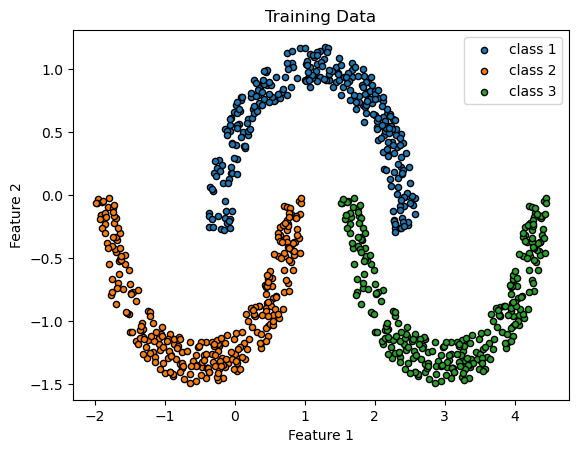

In [47]:
plt.scatter(df_train_list[0].iloc[:, 0], df_train_list[0].iloc[:, 1], s=20, edgecolor='k', label='class 1')
plt.scatter(df_train_list[1].iloc[:, 0], df_train_list[1].iloc[:, 1], s=20, edgecolor='k', label='class 2')
plt.scatter(df_train_list[2].iloc[:, 0], df_train_list[2].iloc[:, 1], s=20, edgecolor='k', label='class 3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
title = 'Training Data'
plt.title(title)
plt.legend()
saveImage(plt, folder_name, title)
plt.show()

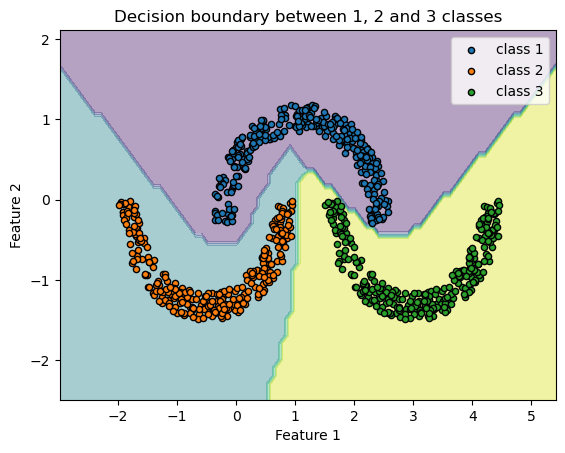

In [48]:
# Define the grid of points to plot the decision boundary
x_min = df_train_data.iloc[:, 0].min() - 1
x_max = df_train_data.iloc[:, 0].max() + 1
y_min = df_train_data.iloc[:, 1].min() - 1
y_max = df_train_data.iloc[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class labels of the grid points
gridPoints = np.c_[xx.ravel(), yy.ravel()]
gridPoints = pd.DataFrame(gridPoints, columns=['a', 'b'])
gridResult = []
for i in range(len(gridPoints)):
    predicted_class, aj1_value_list, aj2_value_list, ak_value_list = predicted_label_trio(gridPoints.iloc[i,:], w_matrix_dict[0][0], w_matrix_dict[0][1], w_matrix_dict[0][2])
    gridResult.append(predicted_class)

gridResult = np.array(gridResult)
gridResult = gridResult.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, gridResult, alpha=0.4)
plt.scatter(df_train_list[0].iloc[:, 0], df_train_list[0].iloc[:, 1], s=20, edgecolor='k', label='class 1')
plt.scatter(df_train_list[1].iloc[:, 0], df_train_list[1].iloc[:, 1], s=20, edgecolor='k', label='class 2')
plt.scatter(df_train_list[2].iloc[:, 0], df_train_list[2].iloc[:, 1], s=20, edgecolor='k', label='class 3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Decision boundary between 1, 2 and 3 classes')
title = f'Decision boundary between 1, 2 and 3 classes'
plt.title(title)
plt.legend()
saveImage(plt, folder_name, title)
plt.show()

In [49]:
y_pred = []
y_true = []

hj1_value_dict = {}
for class_num in range(OutputLayer_nodes):
    hj1_value_dict[class_num] = {}
    for neuron_num in range(hiddenLayer_1_nodes):
        hj1_value_dict[class_num][neuron_num] = []

hj2_value_dict = {}
for class_num in range(OutputLayer_nodes):
    hj2_value_dict[class_num] = {}
    for neuron_num in range(hiddenLayer_2_nodes):
        hj2_value_dict[class_num][neuron_num] = []

hk_value_dict = {}
for class_num in range(OutputLayer_nodes):
    hk_value_dict[class_num] = {}
    for neuron_num in range(OutputLayer_nodes):
        hk_value_dict[class_num][neuron_num] = []

for ds in range(len(df_test_list)):
    testExampleLength = df_test_list[ds].shape[0]
    for i in range(testExampleLength):
        xn = df_test_list[ds].iloc[i,:-1]
        yn = df_test_list[ds].iloc[i,-1]
        y_true.append(yn)
        predicted_class, aj1_value_list, aj2_value_list, ak_value_list = predicted_label_trio(xn, w_matrix_dict[0][0], w_matrix_dict[0][1], w_matrix_dict[0][2])
        
        for j in range(len(aj1_value_list)):
            temp = xn.tolist()
            temp.append(g(aj1_value_list[j]))
            hj1_value_dict[ds][j].append(temp)

        for l in range(len(aj2_value_list)):
            temp = xn.tolist()
            temp.append(g(aj2_value_list[l]))
            hj2_value_dict[ds][l].append(temp)
        
        for k in range(len(ak_value_list)):
            temp = xn.tolist()
            temp.append(f(ak_value_list[k]))
            hk_value_dict[ds][k].append(temp)

        y_pred.append(predicted_class)

print(hj1_value_dict)
print(hj2_value_dict)
print(hk_value_dict)

{0: {0: [[-0.111802, 0.193665, 0.9993380641829559], [0.851103, 0.862322, 0.8265487716483978], [0.94953, 0.910037, 0.7242633193280483], [0.136626, 0.540135, 0.9972501071596239], [1.471664, 1.140993, 0.09960033297841309], [0.213601, 0.57317, 0.9956192546125173], [2.36735, 0.167251, 0.0003025804656214436], [0.823861, 0.929849, 0.8524301512851249], [-0.369646, -0.018603, 0.9998566795428997], [1.840857, 0.729323, 0.00958805552972615], [1.627784, 0.788755, 0.03582658898781061], [0.554659, 0.884392, 0.968076424573713], [2.584647, -0.201576, 6.910699045798417e-05], [0.608102, 0.922031, 0.9565843539238276], [2.182437, 0.280295, 0.0009921822474243333], [0.387624, 0.900721, 0.9885249751377849], [-0.36427, -0.178796, 0.999843478898239], [1.535725, 1.076516, 0.06773764776651085], [1.50515, 0.785016, 0.07368530849619429], [0.076526, 0.440405, 0.9980403825656821], [2.392696, 0.264297, 0.00026718355597439423], [0.415809, 0.904754, 0.9863757312945545], [1.212534, 1.173718, 0.3590655954248181], [-0.2381

Classification accuracy:  1.0
[[100   0   0]
 [  0 100   0]
 [  0   0 100]]


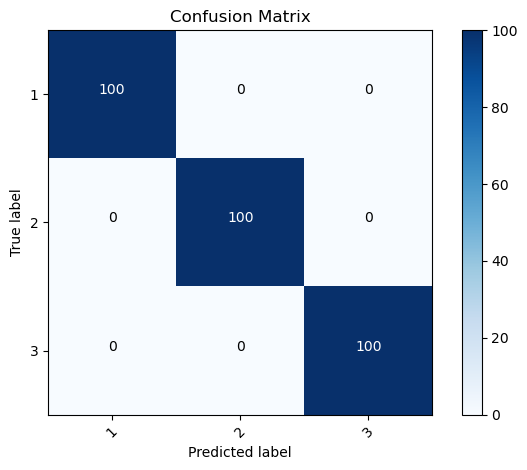

In [50]:
# calculate classification accuracy
accuracy = accuracy_score(y_true, y_pred)
print('Classification accuracy: ', accuracy)

# Compute confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # save the plot to a file in a folder
    saveImage(plt, folder_name, title)

cnf_matrix = confusion_matrix(y_true, y_pred,labels=[1, 2, 3])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1, 2, 3],
                      title='Confusion Matrix')

In [51]:
def scatterPlot3d(neuronSize, classSize, h_value_dict, titleBegin):
    for neuron_num in range(neuronSize):
        # 0,1,2 index have class 1,2,3 respectively
        X = []
        Y = []
        Z = []

        for class_num in range(classSize):
            x, y, z = zip(*(h_value_dict[class_num][neuron_num]))
            X.append(x)
            Y.append(y)
            Z.append(z)

        # Creating figure
        fig = plt.figure(figsize = (5, 4))
        ax = plt.axes(projection ="3d")

        # Creating plot
        ax.scatter3D(X[0], Y[0], Z[0], color = "r", marker='o', alpha = 0.3)
        ax.scatter3D(X[1], Y[1], Z[1], color = "g", marker='o', alpha = 0.3)
        ax.scatter3D(X[2], Y[2], Z[2], color = "b", marker='o', alpha = 0.3)
        ax.set_xlabel('Feature 1', fontweight ='bold')
        ax.set_ylabel('Feature 2', fontweight ='bold')
        ax.set_zlabel('Activation Value', fontweight ='bold')
        # ax.zaxis.labelpad=-1
        ax.legend(['class1','class2','class3'])
        title = f'{titleBegin} {neuron_num+1}'
        plt.title(title)
        saveImage(plt, folder_name, title)
        plt.show()

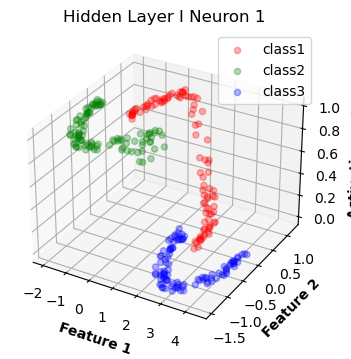

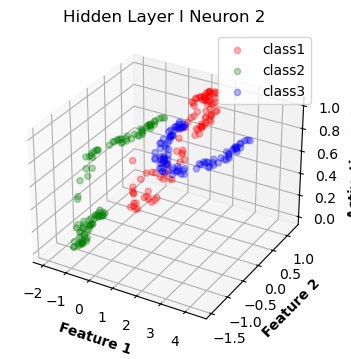

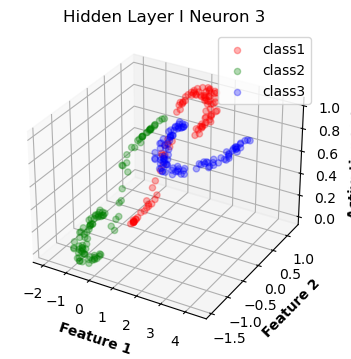

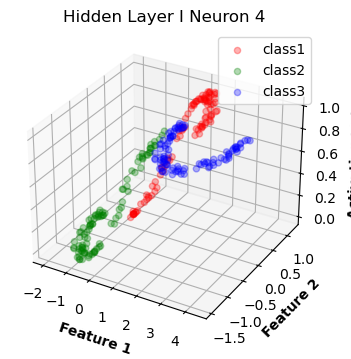

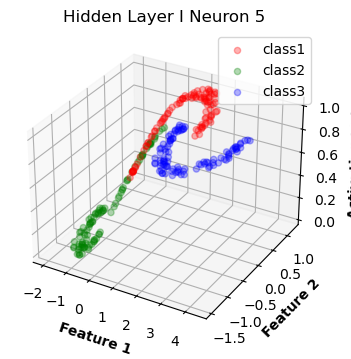

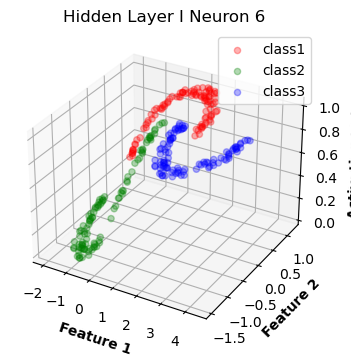

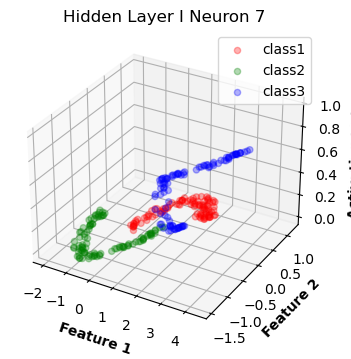

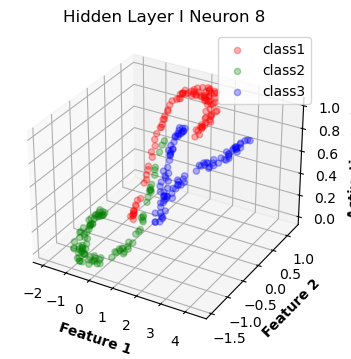

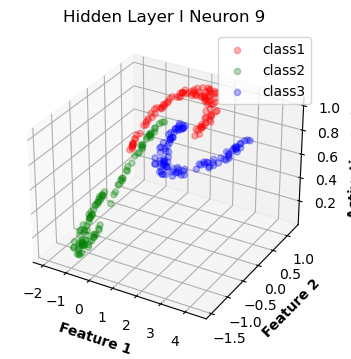

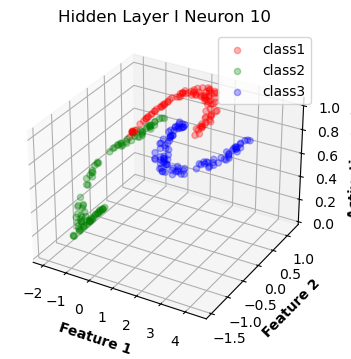

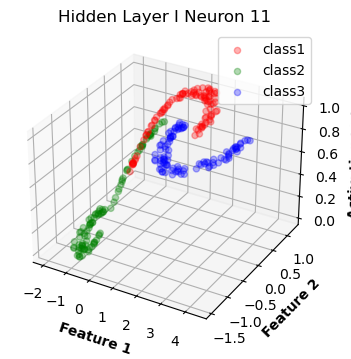

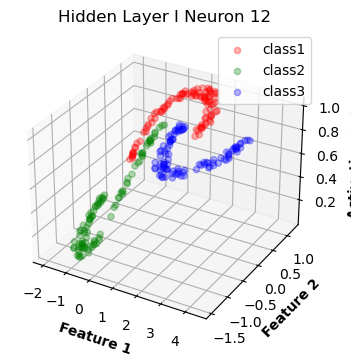

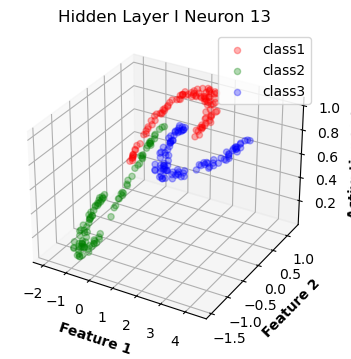

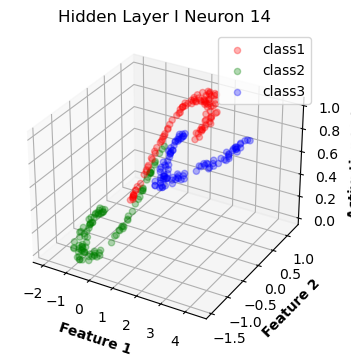

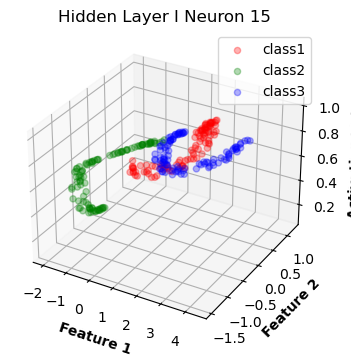

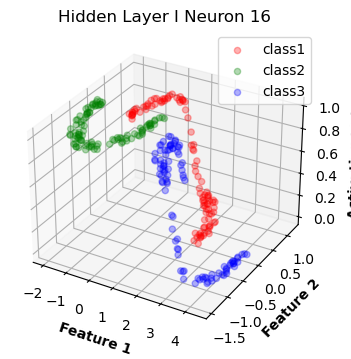

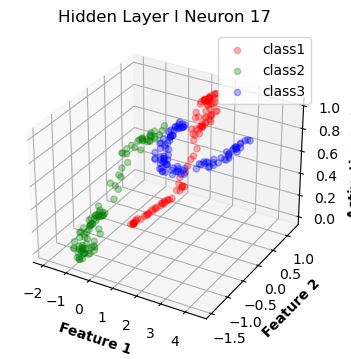

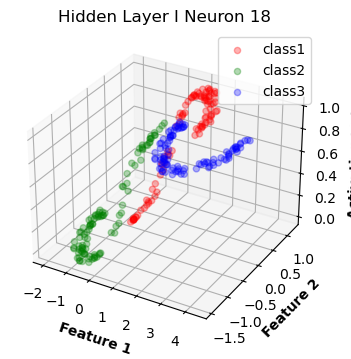

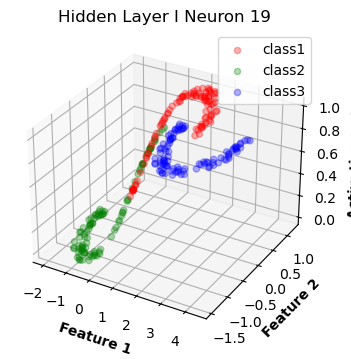

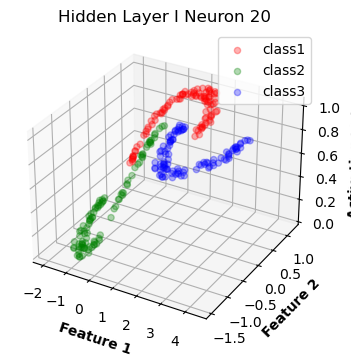

In [52]:
scatterPlot3d(hiddenLayer_1_nodes, OutputLayer_nodes, hj1_value_dict, 'Hidden Layer I Neuron')

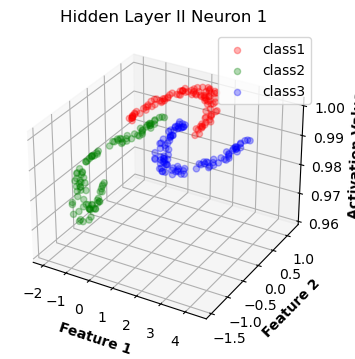

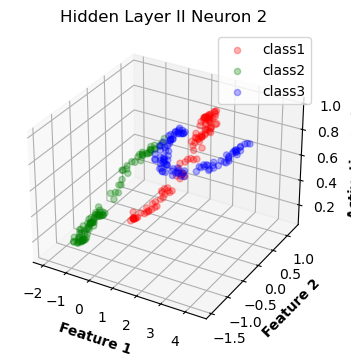

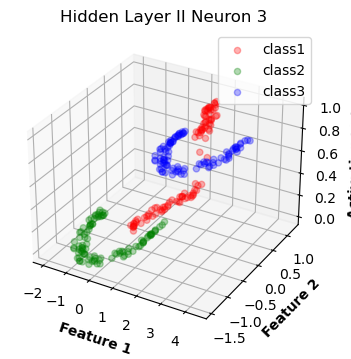

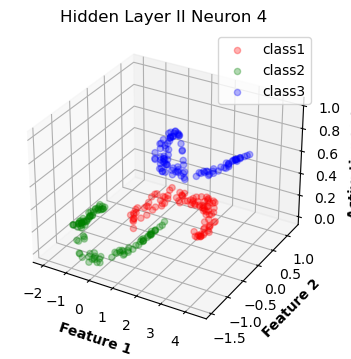

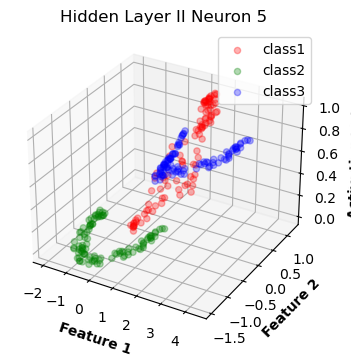

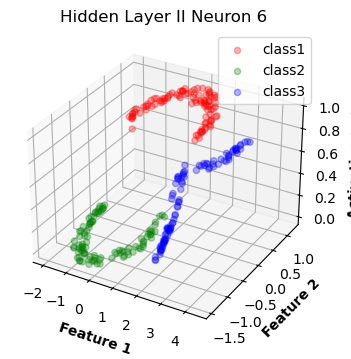

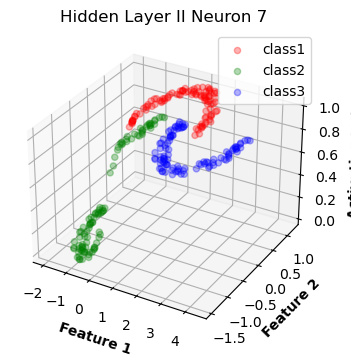

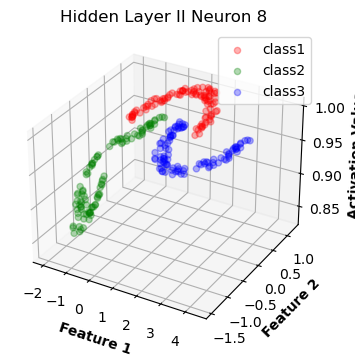

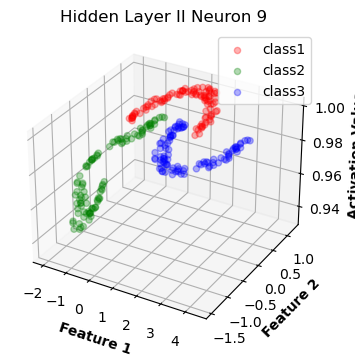

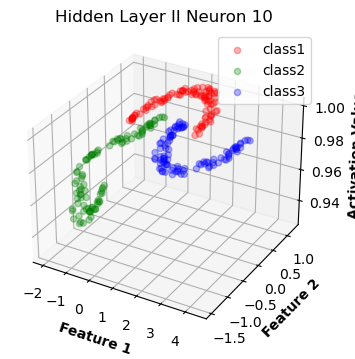

In [53]:
scatterPlot3d(hiddenLayer_2_nodes, OutputLayer_nodes, hj2_value_dict, 'Hidden Layer II Neuron')

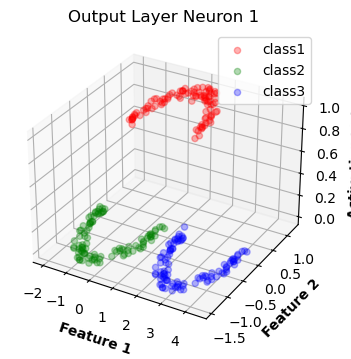

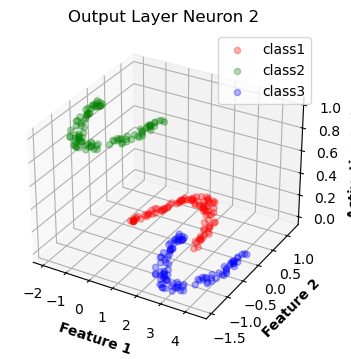

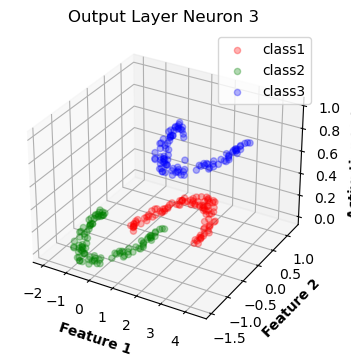

In [54]:
scatterPlot3d(OutputLayer_nodes, OutputLayer_nodes, hk_value_dict, 'Output Layer Neuron')